<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/lagrange_optimization/blob/master/lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lagrangian Optimization
The [Lagrange Multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier) Method allows to find a set of equations which describe where an objective function is maximum or minimum, knowing that there are one or more constraint functions.

Depending on whether the object function is convex or concave, we will determine minimum or maximum values, respectively.


## Idea
Lagrangian Optimization is based on the idea that the objective function is maximized or minimized when the gradient of the objective function (the direction of the maximum change of the objective function) is parallel (is the same that) to the gradient(s) of the constraint function(s).

For example, if we have an objetive function $O(x,y)$ and a constraint function $C(x,y)$, we have that
\begin{align}
\frac{\partial O}{\partial x} = \lambda \frac{\partial C}{\partial x}\\
\frac{\partial O}{\partial y} = \lambda \frac{\partial C}{\partial y}.\\
\end{align}

These equations, considered with the constraint(s), allow to find a set of equations, that when solved, determine the values of $x$ and $y$ that maximize or minimize the objective function.

## Example of use in block-based image transform coding (continuous case)
In transform codind, the codec divides the input image in $N$ blocks that are transformed into $M$ coefficients. Supposing that we are going to quantize each block using the same quantization matrix, we want to find how many bits should be used used for each coefficient.

Let

\begin{equation}
  R = \sum_k^M R_k \tag{1}
\end{equation}

the average number of bits/coefficient and $R_i$ the average number of bits assigned to each coefficient.

In transform coding, on average, the distortion introduced by the quantization of a coefficient is proportional to the variance of the position of the coefficient in the block. Specifically, for the $i$-th quantizer, the variance of the reconstruction error is

\begin{equation}
  \sigma(r)^2_k = \alpha_k2^{-2R_k}\sigma(i)^2_k, \tag{2}
\end{equation}

where $\sigma(i)^2_k$ is the variance of the input quantizer, and $\alpha_k$ is a factor that depends on the input distribution of the quantizer.

The total reconstruction error is given by

\begin{equation}
  \sigma(r)^2 = \sum_k^M\alpha_k2^{-2R_k}\sigma(i)^2_k. \tag{3}
\end{equation}

The objective of the bit allocation procedure is to find $\{R_k\}$ to minimize Eq. 3, subject to the constraint of Eq. 1. Assuming that $\alpha_k$ is constant for all $k$, we can set up the minimization problem in terms of Lagrange Multipliers as

\begin{equation}
  J = \alpha\sum_k^M2^{-2R_k}\sigma(i)^2_k-\lambda (R-\frac{1}{M}\sum_k^M R_k). \tag{4}
\end{equation}

Taking the derivative of $J$ with respect to $R_k$ and setting it equal to zero, we obtain that

\begin{equation}
  R_k = \frac{1}{2}\log_2(2\alpha\ln(2\sigma(i)^2))-\frac{1}{2}\log_2(\lambda). \tag{5}
\end{equation}

Substituting Eq. 5 in Eq. 1, we get that

\begin{equation}
  \lambda = \prod_k^M(2\alpha\ln(2\sigma(i)^2_k))^{\frac{1}{M}} 2^{-2R}. \tag{6}
\end{equation}

Substituting Eq. 6 in Eq. 5, we finally obtain the individual bit allocations

\begin{equation}
  R_k = R + \frac{1}{2}\log_2\frac{\sigma(i)^2_k}{\prod_k^M(\sigma(i)^2_k)^{\frac{1}{M}}}.
\end{equation}


## Example of use in subband coding
In subband coding, the whole image is transformed and a set of subbands is obtained.



## Application to Rate/Distortion Optimization

Data compression try to reduce the rate of the code-stream (objective) $R$ given a certain distortion (constraint) $D$. The other posibility if to minimize $D$ (objective) given a certain $R$ (constraint). The second case is usually the most frequent. In this case, the optimization problem can be described by:
\begin{equation}
\end{equation}



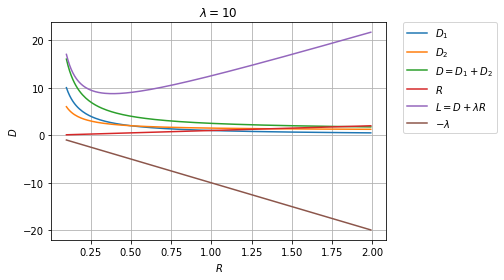

<IPython.core.display.Math object>

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math, Latex

# Data for plotting
R = np.arange(0.1, 2.0, 0.01)
D1 = 1/R
D2 = 0.5/R+1
D = D1+D2
_lambda = 10
L = D+_lambda*R

fig, ax = plt.subplots()
ax.plot(R, D1, label="$D_1$")
ax.plot(R, D2, label="$D_2$")
ax.plot(R, D, label="$D=D_1+D_2$")
ax.plot(R, R, label="$R$")
ax.plot(R, L, label="$L=D+\lambda R$")
ax.plot(R, -R*_lambda, label="$-\lambda$")

ax.set(xlabel='$R$', ylabel='$D$', title='$\lambda={}$'.format(_lambda))
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


#fig.savefig("test.png")
plt.show()
display(Math(r'\text{Minimum of}~L~\text{at}~R=' + str(np.argmin(L)*0.01) + r'~\text{for}~\lambda=' + str(_lambda)))